## Seeds

Выборка содержит информацию о зернах пшеницы, относящихся к трем разным сортам: Kama, Rosa и Canadian, по 70 штук, выбранных случайным образом.
Для построения данных были измерены семь параметров зёрен пшеницы:
1. Площадь A
2. Периметр P
3. Компактность C = 4 * pi * A / P ^ 2
4. Длина ядра
5. Ширина ядра
6. Коэффициент асимметрии
7. Длина канавки.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [29]:
url = 'https://vk.com/doc25188640_451335064'
data = pd.read_csv(url, sep = ', ', engine = 'python')

In [16]:
type(data)

pandas.core.frame.DataFrame

In [30]:
data

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Assymetry coeff,Length of groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


In [31]:
print(data)

      Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
5    14.38      14.21       0.8951             5.386            3.312   
6    14.69      14.49       0.8799             5.563            3.259   
7    14.11      14.10       0.8911             5.420            3.302   
8    16.63      15.46       0.8747             6.053            3.465   
9    16.44      15.25       0.8880             5.884            3.505   
10   15.26      14.85       0.8696             5.714            3.242   
11   14.03      14.16       0.8796             5.438            3.201   
12   13.89      14.02       0.8880             5.43

In [34]:
data.columns = [u'area', u'perimeter', u'compactness', u'length', u'width',
       u'assymetry', u'lengthGroove', u'variety']

In [35]:
data.head()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [36]:
data.tail()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


- `area` - Площадь A
- `perimeter` - Периметр P
- `compactness` - Компактность C = 4 * pi * A / P ^ 2
- `length` - Длина ядра
- `width` - Ширина ядра
- `assymetry` - Коэффициент асимметрии
- `lengthGroove` - Длина канавки.

In [37]:
print(data.shape)
print(data.columns)

(210, 8)
Index(['area', 'perimeter', 'compactness', 'length', 'width', 'assymetry',
       'lengthGroove', 'variety'],
      dtype='object')


In [ ]:
#data.columns = []

In [38]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            200, 201, 202, 203, 204, 205, 206, 207, 208, 209],
           dtype='int64', length=210)

In [39]:
data.at[2, 'perimeter']

14.09

In [40]:
data['perimeter']

0      14.84
1      14.57
2      14.09
3      13.94
4      14.99
5      14.21
6      14.49
7      14.10
8      15.46
9      15.25
10     14.85
11     14.16
12     14.02
13     14.06
14     14.05
15     14.28
16     13.83
17     14.75
18     14.21
19     13.57
20     14.40
21     14.26
22     14.90
23     13.23
24     14.76
25     15.16
26     13.76
27     13.67
28     14.18
29     14.02
       ...  
180    12.95
181    13.41
182    13.36
183    13.07
184    13.77
185    13.31
186    13.45
187    12.80
188    12.82
189    12.41
190    12.80
191    12.86
192    13.02
193    12.83
194    13.27
195    13.47
196    13.53
197    13.78
198    13.67
199    13.38
200    13.44
201    13.32
202    12.72
203    13.41
204    13.47
205    13.20
206    12.88
207    13.66
208    13.21
209    13.34
Name: perimeter, Length: 210, dtype: float64

In [41]:
data['perimeter'][3]

13.94

In [42]:
data['width'].dtype.name

'float64'

In [43]:
type(data['length'][3])

numpy.float64

In [44]:
type(data['length'])

pandas.core.series.Series

In [45]:
data[['area', 'length']].head()

,area,length
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [17]:
#data.index = xrange(32561)
#data.index

_Основные характеристики выборки по каждому из пара метров._

In [46]:
data.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


_Матрица ковариаций_

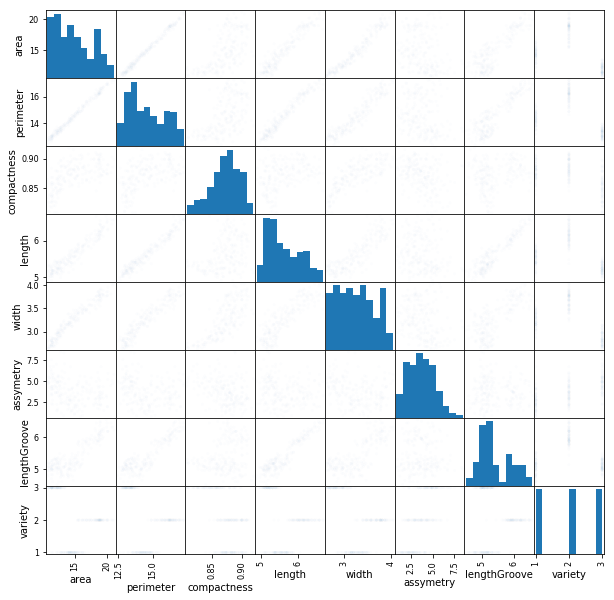

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

_Корреляция параметров_

In [48]:
data.corr()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
assymetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
variety,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


_Отрисовка графика для параметров area и length_

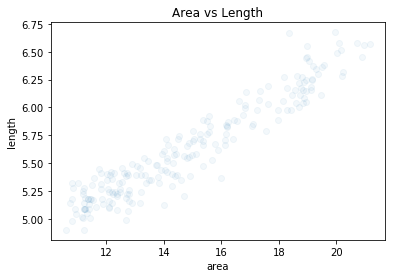

In [49]:
plt.plot(data['area'], data['length'], 'o', alpha = 0.05)
plt.xlabel('area')
plt.ylabel('length')
plt.title('Area vs Length')
pass

_Проверка выполнения условия в столбце_

In [52]:
data['variety'] == 1

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196    False
197    False
198    False
199    False
200    False
201    False
202    False
203    False
204    False
205    False
206    False
207    False
208    False
209    False
Name: variety, Length: 210, dtype: bool

_Отображение пары (площадь зерна, длина зерна) для 1 и 2 сортов_

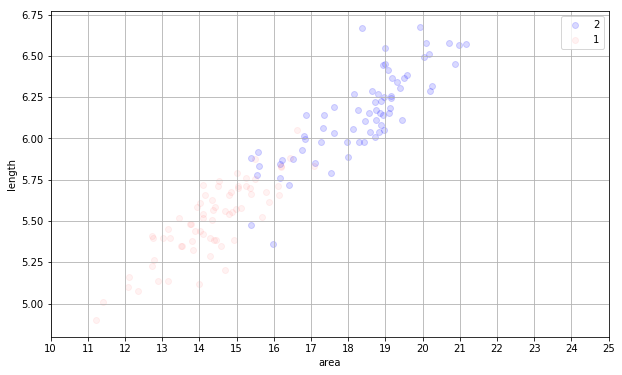

In [55]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['variety'] == 2]['area'],
            data[data['variety'] == 2]['length'],
            alpha = 0.15,
            label = '2',
            color = 'b')

plt.scatter(data[data['variety'] == 1]['area'],
            data[data['variety'] == 1]['length'],
            alpha = 0.05,
            label = '1',
            color = 'r')

plt.xlabel('area')
plt.xticks(range(10, 26))
plt.xlim(10, 25)
plt.ylabel('length')
plt.legend()
plt.grid()

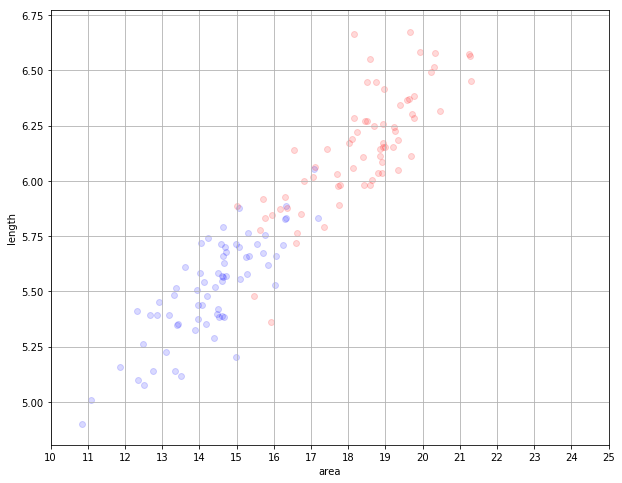

In [61]:
np.random.seed(0)
area_rnd = data['area'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(area_rnd[data['variety'] == 1],
            data[data['variety'] == 1]['length'],
            alpha = 0.15,
            label = '1',
            color = 'b')

plt.scatter(area_rnd[data['variety'] == 2],
            data[data['variety'] == 2]['length'],
            alpha = 0.15,
            label = '2',
            color = 'r')

plt.xlabel('area')
plt.xticks(range(10, 26))
plt.xlim(10, 25)
plt.ylabel('length')
plt.title('')
plt.grid()

_График площади и периметра для 1 и 2 групп_

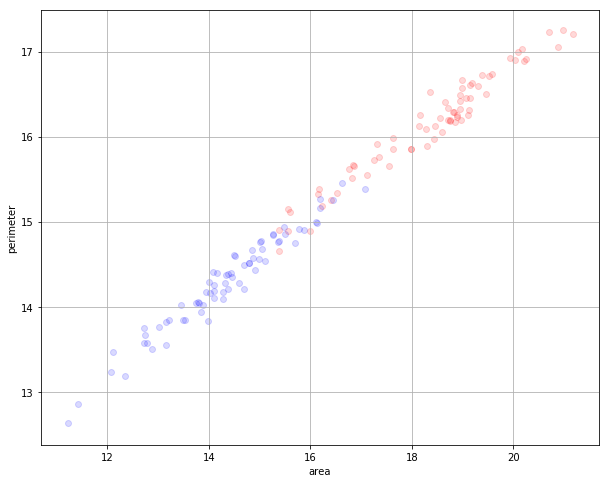

In [57]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['variety'] == 2]['area'],
            data[data['variety'] == 2]['perimeter'],
            alpha = 0.15,
            label = '2',
            color = 'r')

plt.scatter(data[data['variety'] == 1]['area'],
            data[data['variety'] == 1]['perimeter'],
            alpha = 0.15,
            label = '1',
            color = 'b')

plt.xlabel('area')
plt.ylabel('perimeter')
plt.grid()

_Параметры стоблцов с типом float_

In [60]:
data.describe(include = ['float'])

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


_Параметры столбцов с любым типом_

In [62]:
data.describe(include = 'all')

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


_Уникальные значения в столбце_

In [64]:
data['variety'].unique()

array([1, 2, 3], dtype=int64)

In [65]:
data['length'].unique()

array([ 5.763,  5.554,  5.291,  5.324,  5.658,  5.386,  5.563,  5.42 ,
        6.053,  5.884,  5.714,  5.438,  5.439,  5.479,  5.482,  5.351,
        5.119,  5.527,  5.205,  5.226,  5.52 ,  5.618,  5.099,  5.789,
        5.833,  5.395,  5.541,  5.516,  5.454,  5.757,  5.717,  5.585,
        5.712,  5.709,  5.826,  5.832,  5.656,  5.397,  5.348,  5.138,
        5.877,  5.579,  5.376,  5.701,  5.57 ,  5.545,  5.678,  5.674,
        5.715,  5.504,  5.741,  5.702,  5.388,  5.384,  5.662,  5.159,
        5.008,  4.902,  5.076,  5.262,  5.139,  5.63 ,  5.609,  5.569,
        5.412,  6.191,  5.998,  5.978,  6.154,  6.017,  5.927,  6.064,
        6.579,  6.445,  5.85 ,  5.875,  6.006,  6.285,  6.384,  6.366,
        6.173,  6.084,  6.549,  6.573,  6.45 ,  6.581,  6.172,  6.272,
        6.037,  6.666,  6.139,  6.341,  6.449,  6.271,  6.219,  5.718,
        5.89 ,  6.113,  6.369,  6.248,  6.152,  6.033,  6.675,  6.153,
        6.107,  6.303,  6.183,  6.259,  6.563,  6.416,  6.051,  6.245,
      

_Длина первого зерна в каждой группе_

In [68]:
for name in data['variety'].unique():
    print(name, data['length'][data['variety'] == name].iloc[0])

1 5.763
2 6.191
3 5.472


In [69]:
data['assymetry'].unique()

array([ 2.221 ,  1.018 ,  2.699 ,  2.259 ,  1.355 ,  2.462 ,  3.586 ,
        2.7   ,  2.04  ,  1.969 ,  4.543 ,  1.717 ,  3.986 ,  3.136 ,
        2.932 ,  4.185 ,  5.234 ,  1.599 ,  1.767 ,  4.102 ,  3.072 ,
        2.688 ,  0.7651,  1.415 ,  1.791 ,  0.903 ,  3.373 ,  2.504 ,
        2.754 ,  3.531 ,  0.8551,  3.412 ,  3.92  ,  2.124 ,  2.129 ,
        2.27  ,  2.823 ,  2.956 ,  3.112 ,  6.685 ,  2.587 ,  2.249 ,
        2.461 ,  4.711 ,  3.128 ,  1.56  ,  1.367 ,  2.958 ,  2.704 ,
        3.975 ,  5.593 ,  4.116 ,  3.328 ,  1.481 ,  1.933 ,  2.802 ,
        1.142 ,  1.999 ,  1.502 ,  2.269 ,  3.22  ,  4.157 ,  1.176 ,
        2.352 ,  1.313 ,  2.217 ,  1.464 ,  3.533 ,  4.076 ,  4.675 ,
        4.539 ,  2.936 ,  4.004 ,  4.92  ,  3.824 ,  4.451 ,  5.064 ,
        2.858 ,  5.532 ,  5.324 ,  5.173 ,  1.472 ,  2.962 ,  2.443 ,
        1.649 ,  3.691 ,  5.78  ,  5.016 ,  1.955 ,  3.12  ,  3.237 ,
        6.001 ,  4.933 ,  3.696 ,  3.477 ,  2.144 ,  2.853 ,  2.188 ,
        4.217 ,  2.0

## Задача

Удалим площадь, т.к. она может быть посчитана умножением длины на ширину

In [70]:
data.drop(['area'], axis = 1) # так тоже работает

,perimeter,compactness,length,width,assymetry,lengthGroove,variety
0,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,15.25,0.8880,5.884,3.505,1.9690,5.533,1


# Готовим данные

In [71]:
data['perimeter'].dtype.name

'float64'

In [72]:
data['variety'].dtype.name

'int64'

In [107]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
numerical_columns   = [c for c in data.columns if data[c].dtype.name == 'float64']
print(categorical_columns)
print(numerical_columns)

['variety']
['area', 'perimeter', 'compactness', 'length', 'width', 'assymetry', 'lengthGroove']


In [76]:
for c in numerical_columns:
    print(c, data[c].unique())

area [ 15.26  14.88  14.29  13.84  16.14  14.38  14.69  14.11  16.63  16.44
  14.03  13.89  13.78  13.74  14.59  13.99  15.69  14.7   12.72  14.16
  15.88  12.08  15.01  16.19  13.02  12.74  13.45  13.16  15.49  14.09
  13.94  15.05  16.12  16.2   17.08  14.8   14.28  13.54  13.5   15.5
  15.11  13.8   15.36  14.99  14.79  14.86  14.43  15.78  14.49  14.33
  14.52  15.03  14.46  14.92  15.38  12.11  11.42  11.23  12.36  13.22
  12.78  12.88  14.34  14.01  14.37  12.73  17.63  16.84  17.26  19.11
  16.82  16.77  17.32  20.71  18.94  17.12  16.53  18.72  20.2   19.57
  19.51  18.27  18.88  18.98  21.18  20.88  20.1   18.76  18.81  18.59
  18.36  16.87  19.31  18.17  16.41  17.99  19.46  19.18  18.95  18.83
  18.85  19.94  18.55  18.45  19.38  19.13  19.14  20.97  19.06  18.96
  19.15  18.89  20.03  20.24  18.14  16.17  18.43  15.99  18.75  18.65
  17.98  20.16  17.55  18.3   16.16  15.56  17.36  15.57  15.6   16.23
  13.07  13.32  13.34  12.22  11.82  11.21  11.43  12.49  12.7   10.79
  

## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [77]:
data.median(axis = 0)

area            14.35500
perimeter       14.32000
compactness      0.87345
length           5.52350
width            3.23700
assymetry        3.59900
lengthGroove     5.22300
variety          2.00000
dtype: float64

In [78]:
data = data.fillna(data.median(axis = 0), axis = 0)

_Нет пропущенных данных_

In [79]:
data[numerical_columns].count(axis = 0)

area            210
perimeter       210
compactness     210
length          210
width           210
assymetry       210
lengthGroove    210
variety         210
dtype: int64

In [80]:
data[categorical_columns].count(axis = 0)

Series([], dtype: int64)

_Хар-ки столбца_

In [81]:
data['variety'].describe()

count    210.000000
mean       2.000000
std        0.818448
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: variety, dtype: float64

In [85]:
type(data['variety'].describe())

pandas.core.series.Series

_Заполняем пропущенные значения в столбце_

In [88]:
data['variety'] = data['variety'].fillna(4)

In [99]:
data.describe(include = [float])

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [104]:
data_describe = data.describe(include = [float])
for c in numerical_columns:
    data[c] = data[c].fillna(data_describe[c]['max'])

In [135]:
data.describe(include = [float])

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


## Векторизация

В данной выборке отсутствуют категориальные признаки, поэтому векториция не требуется.

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [109]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [110]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

_Нормализация значений_

In [111]:
data_numerical.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-2.254281e-15,-2.566730e-15,1.402780e-15,-4.132144e-15,-2.622241e-16,3.827626e-16,-1.691768e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.463218e+00,-1.645753e+00,-2.661876e+00,-1.646566e+00,-1.664233e+00,-1.952105e+00,-1.808966e+00
25%,-8.858385e-01,-8.494033e-01,-5.966534e-01,-8.267062e-01,-8.329169e-01,-7.573380e-01,-7.387301e-01
50%,-1.692697e-01,-1.832261e-01,1.037448e-01,-2.370616e-01,-5.719866e-02,-6.730769e-02,-3.765590e-01
75%,8.445808e-01,8.849547e-01,7.099807e-01,7.927006e-01,8.025778e-01,7.106807e-01,9.541143e-01
max,2.176333e+00,2.060336e+00,2.001803e+00,2.361889e+00,2.050213e+00,3.163032e+00,2.323446e+00


## Соединяем все в одну таблицу

In [113]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

NameError: name 'data_nonbinary' is not defined

In [112]:
data.describe()

,area,perimeter,compactness,length,width,assymetry,lengthGroove,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# X и y

In [114]:
X = data.drop(('variety'), axis = 1) # выбрасываем столбец 'class'
y = data['variety']
feature_names = X.columns


In [115]:
type(feature_names)

pandas.core.indexes.base.Index

In [116]:
feature_names

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'assymetry',
       'lengthGroove'],
      dtype='object')

In [117]:
print(X.shape)
print(y.shape)
N, d = X.shape

(210, 7)
(210,)


In [118]:
type(X)

pandas.core.frame.DataFrame

In [120]:
type(y)

pandas.core.series.Series

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

147 63


In [122]:
22792+9769

32561

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

# $k$NN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [124]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [125]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0816326530612 0.126984126984


In [126]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [127]:
err_test

0.12698412698412698

In [128]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[17  0  3]
 [ 2 19  0]
 [ 3  0 19]]


In [70]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

### Подбор параметров

In [75]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.167076167076 35


In [76]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.158081783082 0.161940833248
